In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

# Dsecriptive Statistics

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations :-
    
1. Mean is less than median for all columns.
2. There is large difference between standard deviation and maximum for Item_MRP and Item_Output_Sales.

# Exploring Data Variables

In [9]:
pd.set_option('display.max_rows',None)
df['Item_Outlet_Sales'].value_counts()

958.7520      17
1342.2528     16
1845.5976     15
703.0848      15
1278.3360     14
1230.3984     14
1416.8224     13
1438.1280     12
759.0120      12
575.2512      12
1211.7560     12
539.2980      12
852.2240      11
1537.9980     11
1701.7848     11
639.1680      11
679.1160      11
2109.2544     11
2277.0360     11
1406.1696     11
1304.9680     11
2696.4900     10
1470.0864     10
1006.6896     10
2117.2440     10
2956.1520     10
1821.6288     10
2348.9424     10
918.8040      10
1677.8160     10
452.7440      10
2759.0752     10
1518.0240     10
1571.2880     10
527.3136      10
3020.0688     10
3415.5540     10
223.7088      10
1737.7380      9
1713.7692      9
1869.5664      9
1693.7952      9
671.1264       9
1225.0720      9
2157.1920      9
1298.3100      9
447.4176       9
755.0172       9
3691.1952      9
790.9704       9
2684.5056      9
1565.9616      9
2302.3364      9
2450.1440      9
2013.3792      9
1757.7120      9
3435.5280      9
343.5528       8
2059.9852     

In [10]:
# As we have continuos values in sales column, so, this is a regression problem.

# Data Visualizations

# To check missing Values

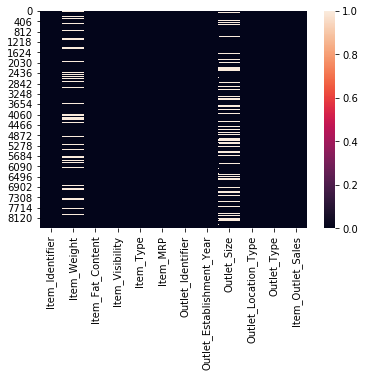

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df['Item_Weight'].mean()

12.857645184136183

In [14]:
df['Item_Weight'].median()

12.6

In [15]:
if df['Item_Weight'].mean()>df['Item_Weight'].median():
    print("Replace null values by mean")
    df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
else:
    print("Replace null values by median")
    df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())
    

Replace null values by mean


In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
df['Outlet_Size'].mode()[0]

'Medium'

In [18]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [20]:
for i in df.columns:
    if df[i].dtypes==object:
        print(df[i].unique())
        df[i]=LE.fit_transform(df[i])
        print(df[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 156    8  662 ... 1323 1524 1519]
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
[1 2 3 0 4]
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
[9 3 0 1 5 7 2 8 6 4]
['Medium' 'High' 'Small']
[1 0 2]
['Tier 1' 'Tier 3' 'Tier 2']
[0 2 1]
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
[1 2 0 3]


# Univariate Analysis

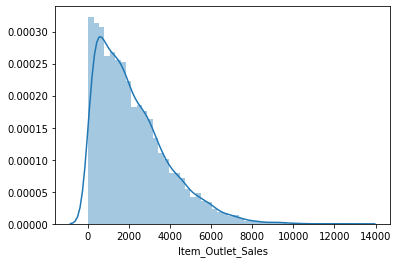

In [21]:
sns.distplot(df['Item_Outlet_Sales'])

Observations :-
    
1. Number of items having Item_Outlet_Sales is directly proportional to Item_Outlet_Sales in the range of 0-1000.
2. Number of items having Item_Outlet_Sales is inversely proportional to Item_Outlet_Sales in the range of 1000-14000.

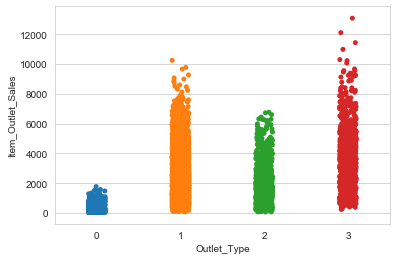

In [22]:
sns.set_style('whitegrid')
sns.stripplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

Observations :-
    
1. The outlet type of Supermarket Type3 has highest item outlet sales.
2. The outlet type of Grocery Store has lowest item outlet sales.

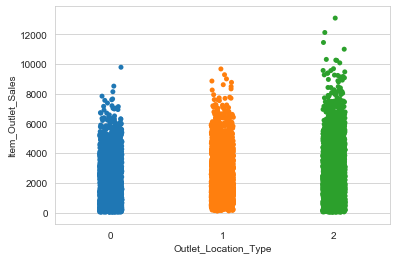

In [23]:
sns.set_style('whitegrid')
sns.stripplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

Observations :-
    
1. The Outlet Location Type of Tier 3 has highest item outlet sales.
2. The Outlet Location Type of Tier 1 has lowest item outlet sales.

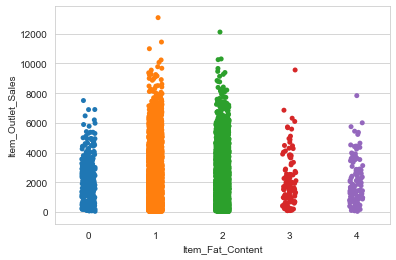

In [24]:
sns.set_style('whitegrid')
sns.stripplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

Observations :-
    
1. Low fat items have highest item outlet sales.
2. Items having reg fat content have lowest item outlet sales.

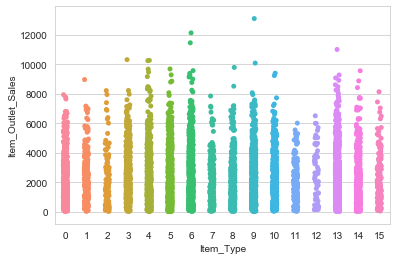

In [25]:
sns.set_style('whitegrid')
sns.stripplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

Observations :-
    
1. Households, Fruits & Vegetables and snacks have highest item outlet sales.
2. Others, Seafoods and Baking goods have lowest item outlet sales.

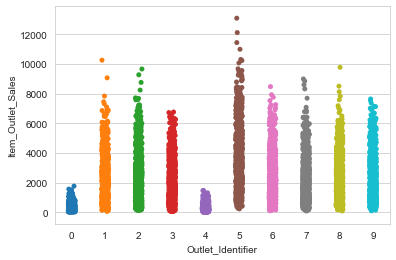

In [26]:
sns.set_style('whitegrid')
sns.stripplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

Observations :-
    
1. OUT027 and OUT013 outlet identifiers have highest item outlet sales.
2. OUT010 and OUT019 outlet identifiers have lowest iem outlet sales.


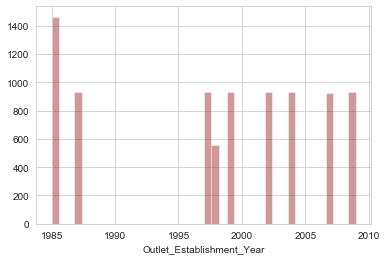

In [27]:
sns.distplot(df['Outlet_Establishment_Year'],kde=False,color='darkred',bins=40)

Observations :-
    
1. In the year 1985, we have highest item outlet sales.
2. In the year 1998, we have lowest item outlet sales. 

In [28]:
dfcor=df.corr()
dfcor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


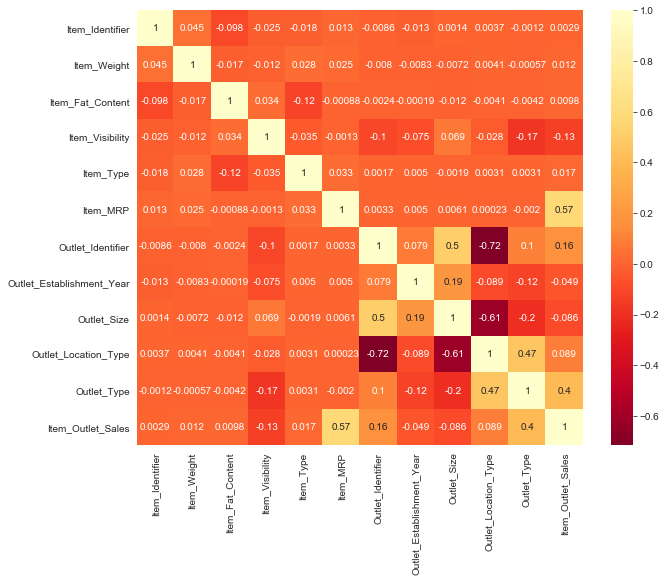

In [29]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations :-
    
1. Item_Outlet_Sales is highly positively correlated to Item_MRP.
2. Item_MRP is highly negatively correlated to Outlet_Size.
3. Outlet_Size is highly positively correlated to Outlet_Establishment_Year.
4. Outlet_Size is highly negatively correlated to Item_Outlet_Sales.

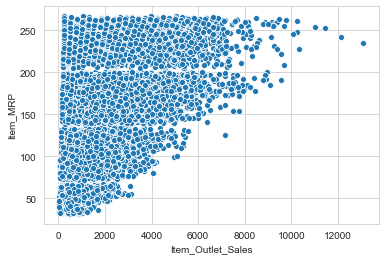

In [30]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_MRP',data=df)

Observations :-
    
1. Item_Outlet_Sales between 0-8000 is more scattered.

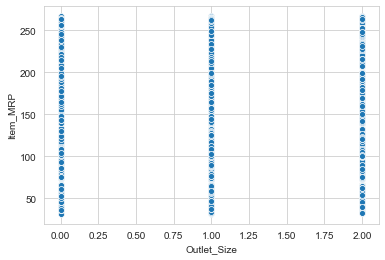

In [31]:
sns.scatterplot(y='Item_MRP',x='Outlet_Size',data=df)

Observations :-
    
1. All outlet sizes have approximately same MRP.

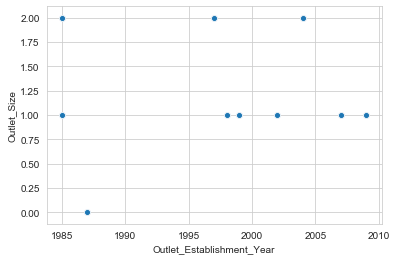

In [32]:
sns.scatterplot(y='Outlet_Size',x='Outlet_Establishment_Year',data=df)

Observations :-
    
1. In the Outlet_Establishment_Year 1995, 1997 and 2004, data has smallest outlet size.
2. In the Outlet_Establishment_Year 1987, data has highest outlet size.

Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Identifier            AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Size                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Location_Type            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.529348,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

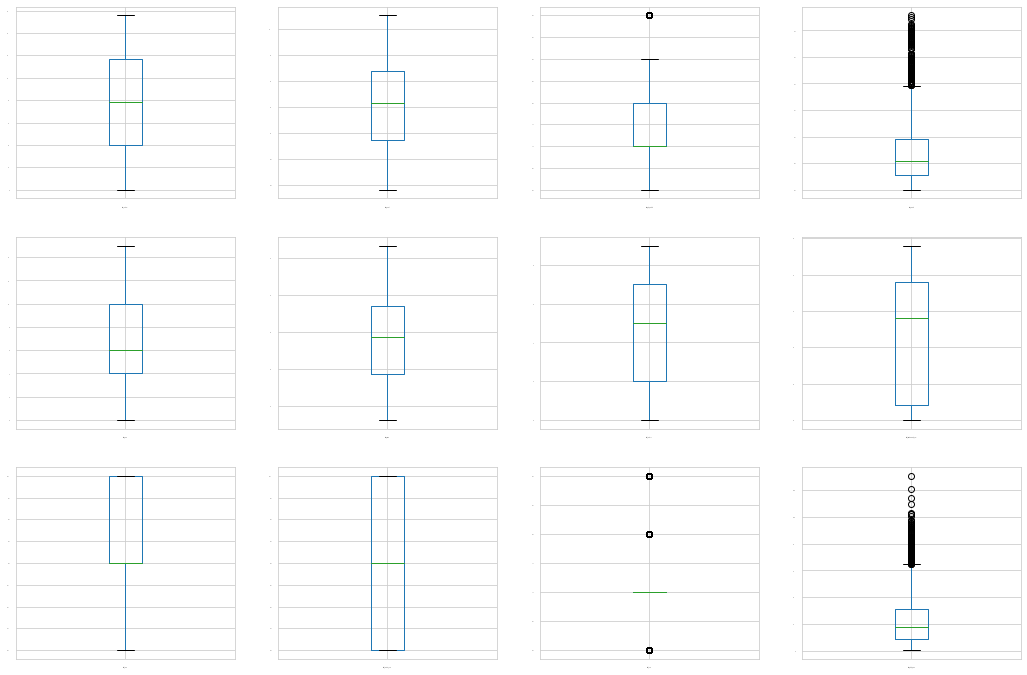

In [33]:
df.plot(kind='box',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Item_Fat_Content, Item_Visibility, Outlet_Type and Item_Outlet_Sales have outliers.

# Removing Outliers

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [35]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [36]:
df_new.shape

(8222, 12)

In [37]:
df.shape

(8523, 12)

In [38]:
# 301 rows are removed as outliers

In [39]:
((8523-8222)/8523)*100

3.5316203214830457

In [40]:
df=df_new

In [41]:
df.shape

(8222, 12)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD79711CC8>,
      dtype=object)

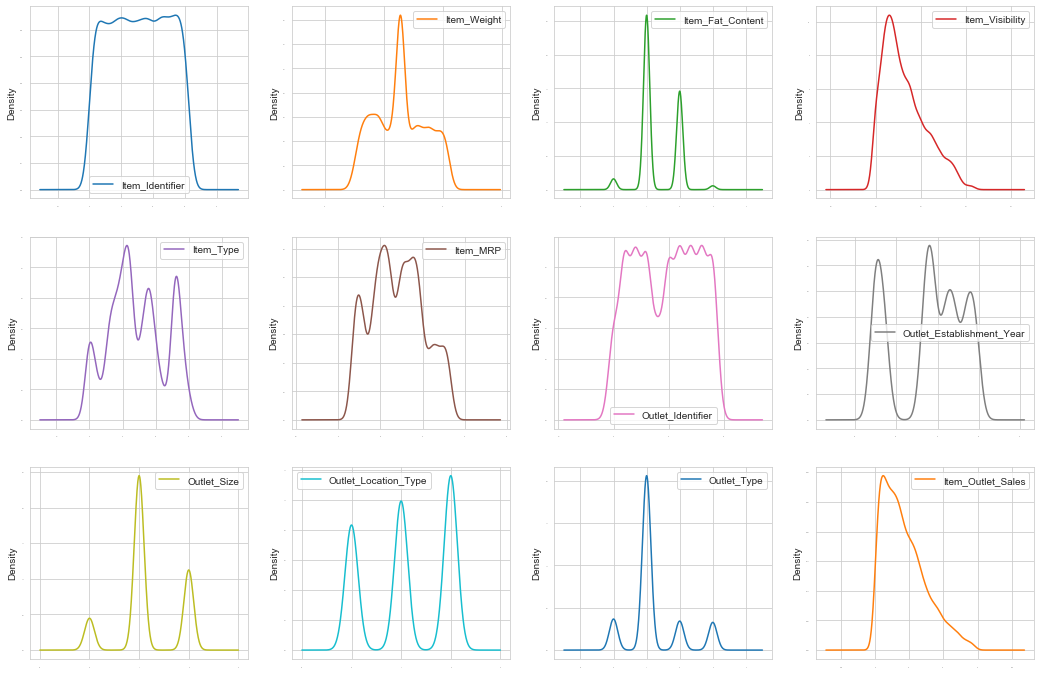

In [42]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations:-
    
1. Item_Visibility, Outlet_Type and Item_Outlet_Sales have right skewed data.

In [43]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [44]:
list=['Item_Visibility','Outlet_Type']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [45]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility             -0.244803
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                 -0.841162
Item_Outlet_Sales            0.877476
dtype: float64

# Train Test Split

In [46]:
x=df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
y=df['Item_Outlet_Sales']

# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [48]:
x=pd.DataFrame(x)

In [49]:
x.columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [50]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Algorithms

In [51]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.5271031473478727
error:
Mean absolute error: 824.3611354637369
Mean squared error: 1154148.6608392233
Root Mean squared error: 1074.3131111734713
0.5388425933914938
error:
Mean absolute error: 824.6825959306177
Mean squared error: 1173389.0336954177
Root Mean squared error: 1083.230831215313
0.5192038957472321
error:
Mean absolute error: 855.9483901348509
Mean squared error: 1251321.1077448367
Root Mean squared error: 1118.6246500702712
0.5432894890972231
error:
Mean absolute error: 844.904668084398
Mean squared error: 1201214.3547925085
Root Mean squared error: 1095.9992494488802
0.5149639217099369
error:
Mean absolute error: 838.2839568707259
Mean squared error: 1211622.2564679394
Root Mean squared error: 1100.7371423132497
0.5595627143781203
error:
Mean absolute error: 806.9737259528712
Mean squared error: 1115667.1734444485
Root Mean squared error: 1056.2514726353988
0.513502268090428
error:
Mean absolute error: 820.7160225170225
Mean squared error: 1130111.036768501
Root Mean sq

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=19)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5598900145282335
error:
Mean absolute error: 790.4420884229488
Mean squared error: 1103346.9508842875
Root Mean squared error: 1050.4032325180115


In [53]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


0.16265918752290243
error:
Mean absolute error: 1031.3407621890549
Mean squared error: 2099196.707175927
Root Mean squared error: 1448.86048575283


In [54]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))


0.5320927497372443
error:
Mean absolute error: 779.242309076838
Mean squared error: 1173034.1390020142
Root Mean squared error: 1083.0670057766574


In [55]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


0.07074771257827528
error:
Mean absolute error: 1165.672078195121
Mean squared error: 2329616.9407062507
Root Mean squared error: 1526.3082718462383


In [56]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [57]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5598900134374523
error:
Mean absolute error: 790.4420895100205
Mean squared error: 1103346.953618854
Root Mean squared error: 1050.403233819686


In [58]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.5598900080810503
error:
Mean absolute error: 790.4420852598843
Mean squared error: 1103346.967047247
Root Mean squared error: 1050.403240211704


In [59]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
pred=el.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.5598865123176322
error:
Mean absolute error: 790.4455708353078
Mean squared error: 1103355.7308563755
Root Mean squared error: 1050.407411843793


In [60]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


0.5574453657747303
error:
Mean absolute error: 749.447034021006
Mean squared error: 1109475.636524695
Root Mean squared error: 1053.3164939963178


In [61]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
print(r2_score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
print('Mean squared error:',mean_squared_error(y_test,predad))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))



0.586686029848273
error:
Mean absolute error: 757.1186766100327
Mean squared error: 1036169.8752096182
Root Mean squared error: 1017.9242973864109


# Cross Validation Scores

In [62]:
from sklearn.model_selection import cross_val_score
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.54159917 0.54575472 0.52772599 0.57748522 0.56743123]
0.551999265271665 0.018022362141233008


Adaboost Regressor is the best algorithm with accuracy score of 59.224 %.

# Hyper Parameter Tuning

In [63]:
ad=AdaBoostRegressor()
grid_param={'loss':['linear', 'square', 'exponential'],'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]}
gd_sr=GridSearchCV(estimator=ad,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [64]:
gd_sr.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

In [65]:
ad_hp=AdaBoostRegressor(learning_rate= 0.01, loss= 'linear', n_estimators= 50)
ad_hp.fit(x_train,y_train)
predad_hp=ad_hp.predict(x_test)
r2score=r2_score(y_test,predad_hp)
print(r2_score(y_test,predad_hp))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad_hp))
print('Mean squared error:',mean_squared_error(y_test,predad_hp))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad_hp)))


0.5701467885400751
error:
Mean absolute error: 751.0761637977614
Mean squared error: 1077633.4231174865
Root Mean squared error: 1038.0912402662334


After hyper parameter tuning, accuracy score of AdaBoost Regressor has changed from 59.480 % to 55.793 %.

So, we will finalise the model that was before hyper parameter tuning, i.e, ad.

In [66]:
df_1=pd.read_csv('bigdatamart_Test.csv')
df_1.head()

df_1.shape

df_1.columns

df_1.dtypes

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [67]:
# To check missing Values

df_1.isnull().sum()

df_1['Item_Weight'].mean()

df_1['Item_Weight'].median()

if df_1['Item_Weight'].mean()>df_1['Item_Weight'].median():
    print("Replace null values by mean")
    df_1['Item_Weight']=df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean())
else:
    print("Replace null values by median")
    df_1['Item_Weight']=df_1['Item_Weight'].fillna(df_1['Item_Weight'].median())
    

df_1['Item_Weight'].isnull().sum()

df_1['Outlet_Size'].mode()[0]

df_1['Outlet_Size']=df_1['Outlet_Size'].fillna(df_1['Outlet_Size'].mode()[0])

df_1['Outlet_Size'].isnull().sum()


Replace null values by mean


0

In [68]:
for i in df_1.columns:
    if df_1[i].dtypes==object:
        print(df_1[i].unique())
        df_1[i]=LE.fit_transform(df_1[i])
        print(df_1[i].unique())

['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
[1103 1067 1406 ... 1332  745  356]
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
[1 4 2 0 3]
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
[13  4 11  6  0  8  1  7 12 14  9  5 10  3 15  2]
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
[9 2 0 5 8 3 7 4 1 6]
['Medium' 'Small' 'High']
[1 2 0]
['Tier 1' 'Tier 2' 'Tier 3']
[0 1 2]
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
[1 0 3 2]


In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))
z

threshold=3
df_1_new=df_1[(z<3).all(axis=1)]

df_1_new.shape

df_1.shape

# 156 rows are removed as outliers

((5681-5525)/5681)*100

df_1=df_1_new

df_1.shape

(5525, 11)

In [70]:
# To check skewness

df_1.skew()


Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.786385
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                  0.949783
dtype: float64

In [71]:
list=['Item_Visibility','Outlet_Type']
for val in list:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [72]:
df_1.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility             -0.285528
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                 -0.829714
dtype: float64

In [ ]:
rom sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df_1)

In [ ]:
df_1=pd.DataFrame(df_1)

In [ ]:
df_1.columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [75]:
pred=ad.fit(df_1)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
df_2=pd.DataFrame(pred)
df_2.to_csv('bigdatamart_submission_1.csv')

# Saving the model